In [96]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

In [97]:
data2 = pd.read_csv("./train.csv")
data1 = pd.read_csv("./test.csv")

In [98]:
data = pd.concat([data2,data1])

In [99]:
data.to_csv('data.csv',index=False)

#### Data Cleaning
The columns in the dataframe are cleaned and reorganized:
* Column names are renamed.
* Rows with NAN values are removed.
* Rows with scores of 0 in the survey of satisfaction are removed (Customers probably did not indicate).
* Satisfaction target is relabelled as 0 and 1.

In [100]:
data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [101]:
data.pop('Unnamed: 0')

0            0
1            1
2            2
3            3
4            4
         ...  
25971    25971
25972    25972
25973    25973
25974    25974
25975    25975
Name: Unnamed: 0, Length: 129880, dtype: int64

In [102]:
data.pop('id')

0         70172
1          5047
2        110028
3         24026
4        119299
          ...  
25971     78463
25972     71167
25973     37675
25974     90086
25975     34799
Name: id, Length: 129880, dtype: int64

In [103]:
data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


Vérifier le nombre de colonnes et de lignes

In [104]:
data.shape

(129880, 23)

Vérifier puis supprimer les valeurs NAN

In [105]:
print("Is there any missing value?",data.isnull().values.any())

Is there any missing value? True


In [106]:
data.isnull().sum().sum()

393

In [12]:
data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [107]:
data.dropna(subset =['Arrival Delay in Minutes'],inplace=True)

In [108]:
data.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [109]:
data.isnull().any()

Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Inflight service                     False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Delay in Minutes             False
satisfaction                         False
dtype: bool

#replace 0 values in some columns because 0 are considered in the survey as not applicable

Rename leg room service to leg room

In [110]:
data = data.rename(columns={'Leg room service':'Leg Room'})

Convert to float Departure delay in Minutes

In [111]:
data['Departure Delay in Minutes'] = data['Departure Delay in Minutes'].astype('float')

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129487 non-null  object 
 1   Customer Type                      129487 non-null  object 
 2   Age                                129487 non-null  int64  
 3   Type of Travel                     129487 non-null  object 
 4   Class                              129487 non-null  object 
 5   Flight Distance                    129487 non-null  int64  
 6   Inflight wifi service              129487 non-null  int64  
 7   Departure/Arrival time convenient  129487 non-null  int64  
 8   Ease of Online booking             129487 non-null  int64  
 9   Gate location                      129487 non-null  int64  
 10  Food and drink                     129487 non-null  int64  
 11  Online boarding                    12948

In [113]:
data = data[(data['Inflight wifi service']!=0)&(data['Departure/Arrival time convenient']!=0)&(data['Ease of Online booking']!=0)&(data['Gate location'])&(data['Food and drink']!=0)&(data['Online boarding']!=0)&(data['Seat comfort']!=0)&(data['Inflight entertainment']!=0)&(data['On-board service']!=0)&(data['Leg Room']!=0)&(data['Baggage handling']!=0)&(data['Checkin service']!=0)&(data['Inflight service']!=0)&(data['Cleanliness']!=0)]


In [114]:
data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg Room,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25.0,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1.0,6.0,neutral or dissatisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11.0,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0.0,0.0,satisfied
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,1,3,4,4,4,4,1,0.0,0.0,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25970,Female,disloyal Customer,36,Business travel,Eco,432,1,5,1,3,...,4,5,2,5,2,3,4,0.0,0.0,neutral or dissatisfied
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0.0,0.0,neutral or dissatisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0.0,0.0,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0.0,0.0,satisfied


Change satisfaction by 1 and O : 1 for satisfied and 0 for neutral or dissatisfied 

In [115]:
data['satisfaction'] = data['satisfaction'].map({'satisfied':1,'neutral or dissatisfied':0})

In [116]:
data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg Room,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25.0,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1.0,6.0,0
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11.0,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0.0,0.0,1
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,1,3,4,4,4,4,1,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25970,Female,disloyal Customer,36,Business travel,Eco,432,1,5,1,3,...,4,5,2,5,2,3,4,0.0,0.0,0
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0.0,0.0,0
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0.0,0.0,0
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0.0,0.0,1


In [117]:
data['Inflight wifi service'].value_counts()

3    20681
1    14925
2    13417
5    10977
4     9066
Name: Inflight wifi service, dtype: int64

In [ ]:
#Pandas profilling

In [82]:
profile = ProfileReport(data, title ='Pandas Profiling Report', explorative=True)

In [83]:
profile.to_file("satisfaction.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [118]:
data.to_csv("data.csv", index=False)

In [57]:
df1 = pd.get_dummies(data,columns=['Gender','Customer Type','Type of Travel','Class'],drop_first=True)
df1

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,5,5,25.0,18.0,0,1,0,1,0,1
1,25,235,3,2,3,3,1,3,1,1,...,4,1,1.0,6.0,0,1,1,0,0,0
3,25,562,2,5,5,5,2,2,2,2,...,4,2,11.0,9.0,0,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,3,3,0.0,0.0,1,1,0,0,0,0
5,26,1180,3,4,2,1,1,2,1,1,...,4,1,0.0,0.0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25970,36,432,1,5,1,3,4,1,4,4,...,3,4,0.0,0.0,0,0,1,0,1,0
25971,34,526,3,3,3,1,4,3,4,4,...,5,4,0.0,0.0,0,1,1,0,0,0
25973,17,828,2,5,1,5,2,1,2,2,...,4,2,0.0,0.0,0,0,0,1,1,0
25974,14,1127,3,3,3,3,4,4,4,4,...,5,4,0.0,0.0,1,1,0,0,0,0


## Exploratory Data Analysis and Feature Selection

#### Create vizualization to better analyze the data

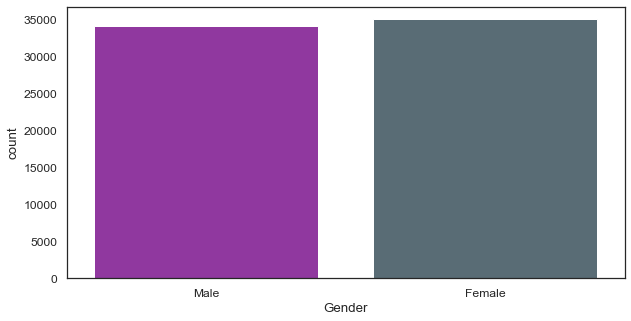

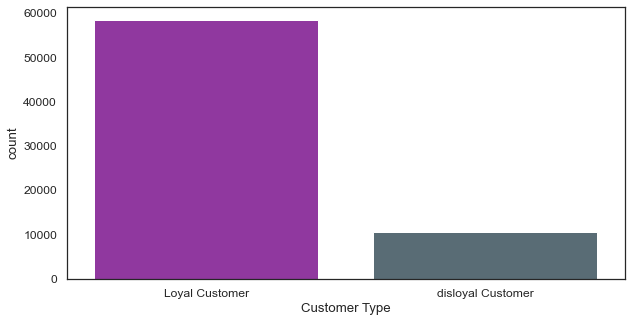

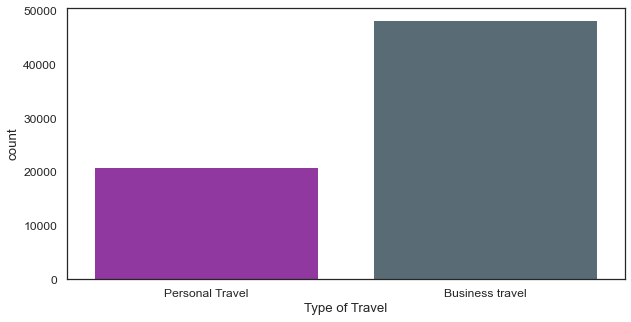

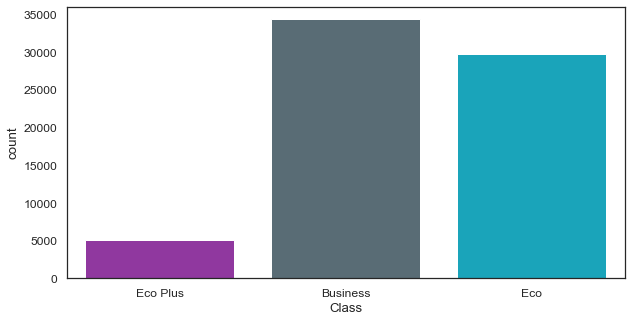

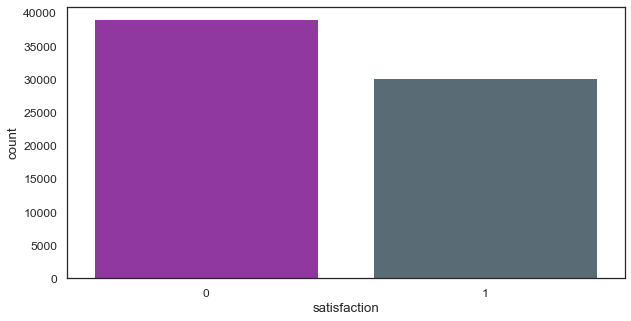

In [119]:
pal = ["#9c27b0", "#546e7a","#00b8d4"]
category=["Gender","Customer Type","Type of Travel","Class","satisfaction"]
for col in category:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col,data=data, palette=pal)
    plt.show()
    %matplotlib inline

The first graphics illustrates the repartition of travellers : first, the repartition between men and women, the type of customer. We can see from the graph that the ratio between business travel and personal travel is high. We can make an hypothese that explain wh thre is much more traveler in Business class than in any other class, as business traval are usually organized by companies and are made in business class.
The ratio between the Unsastified and satisfied customer is also high, as the unsatisfied customer response also include the neutral responses.

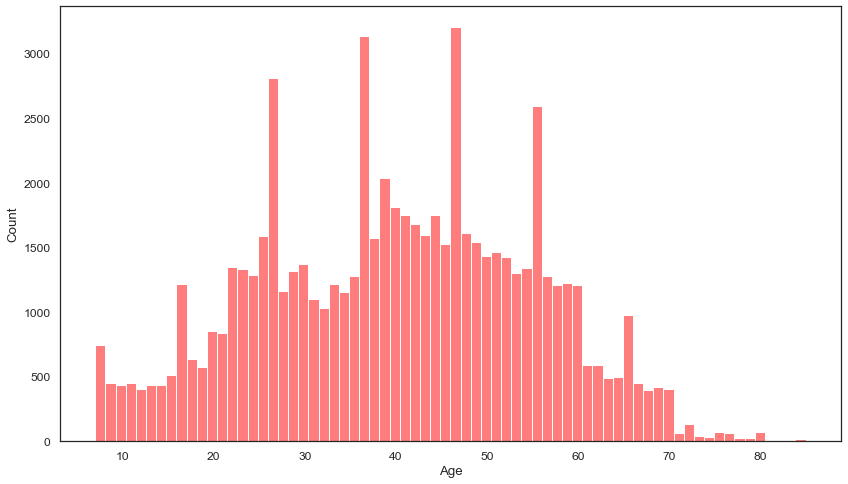

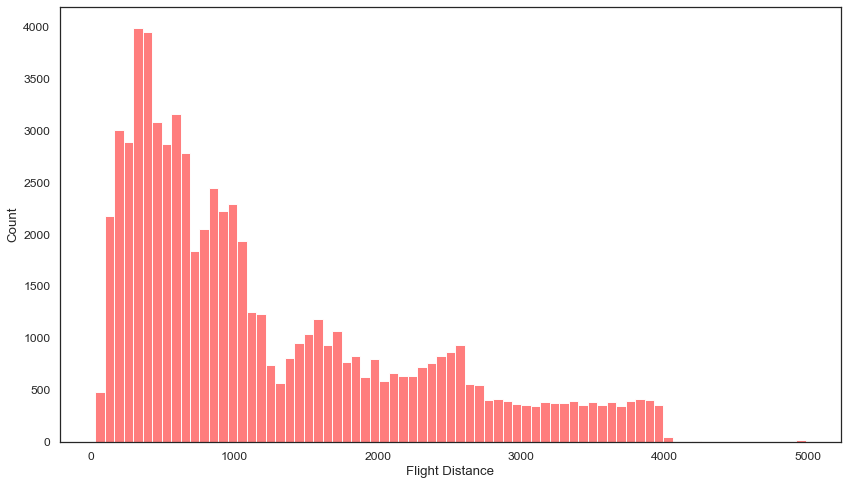

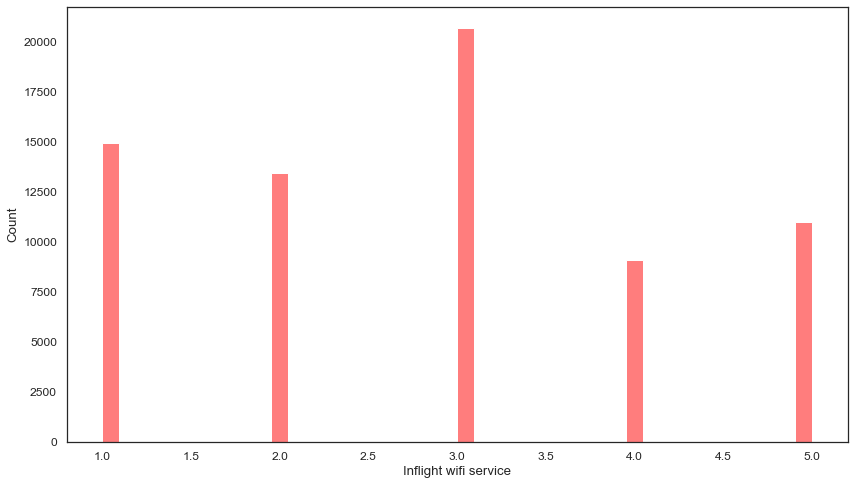

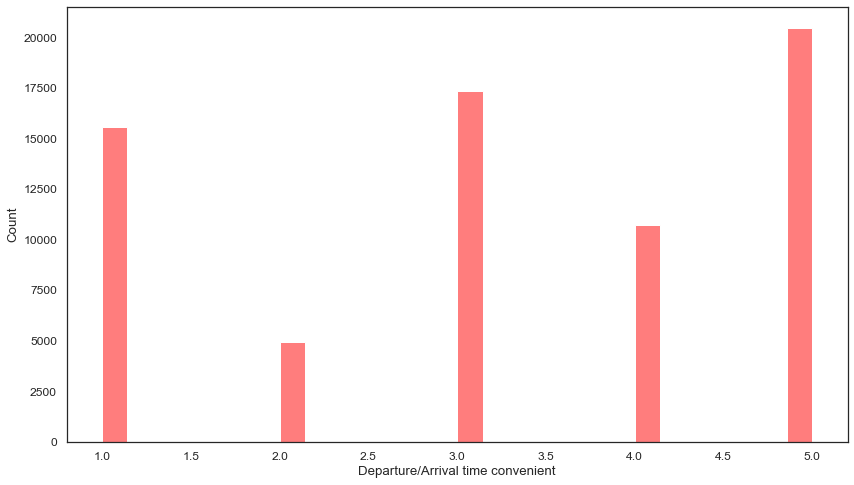

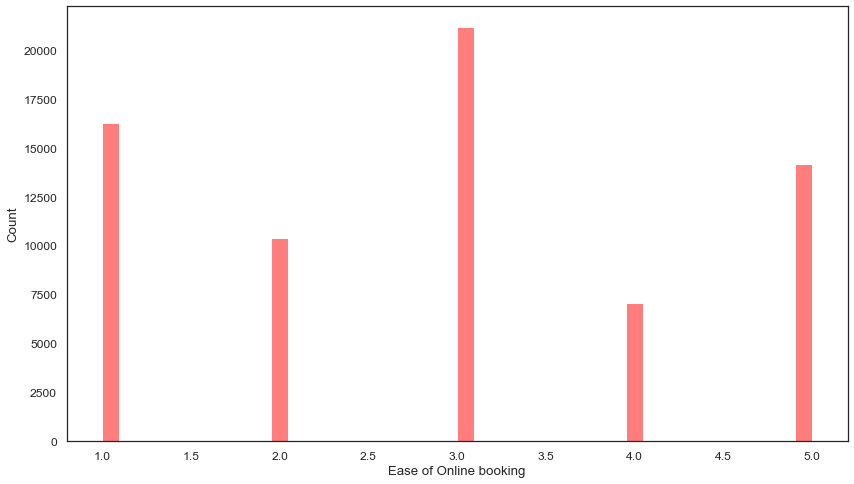

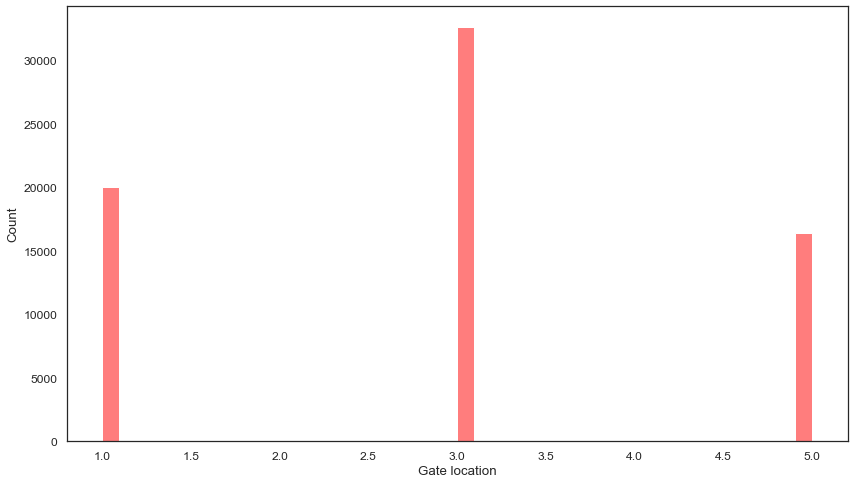

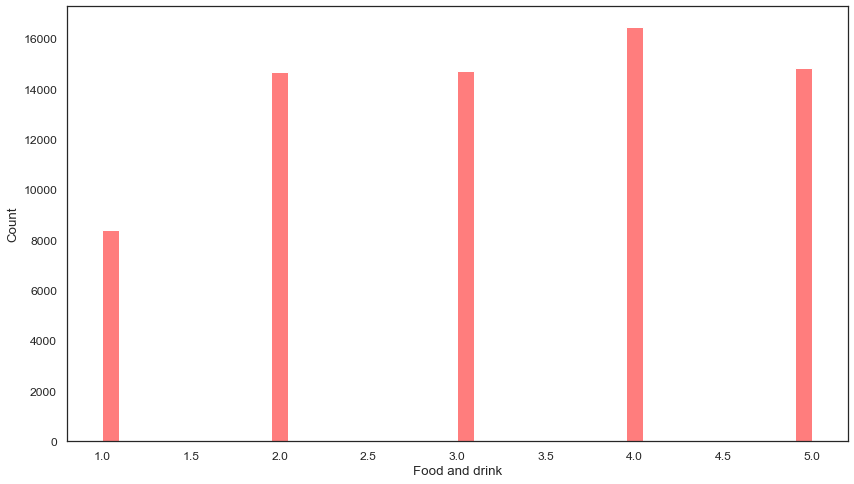

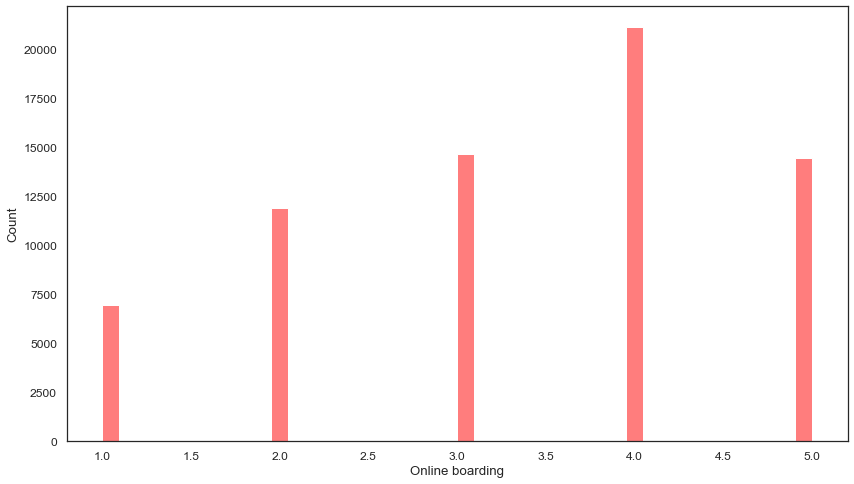

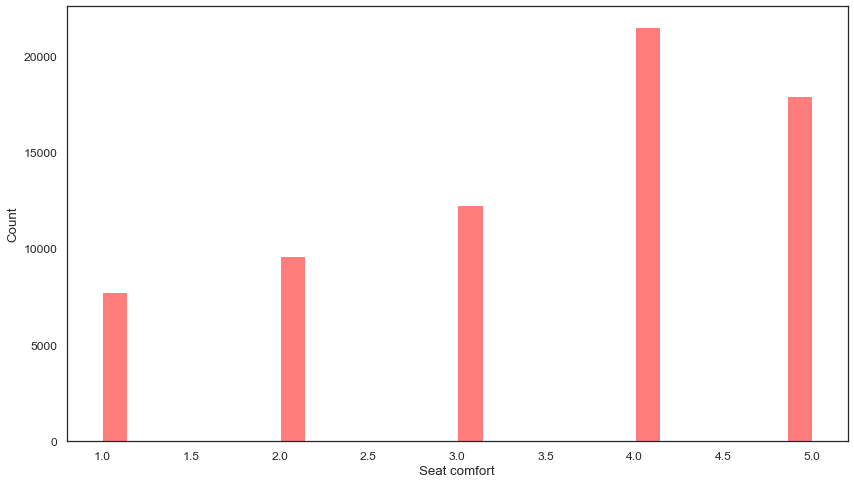

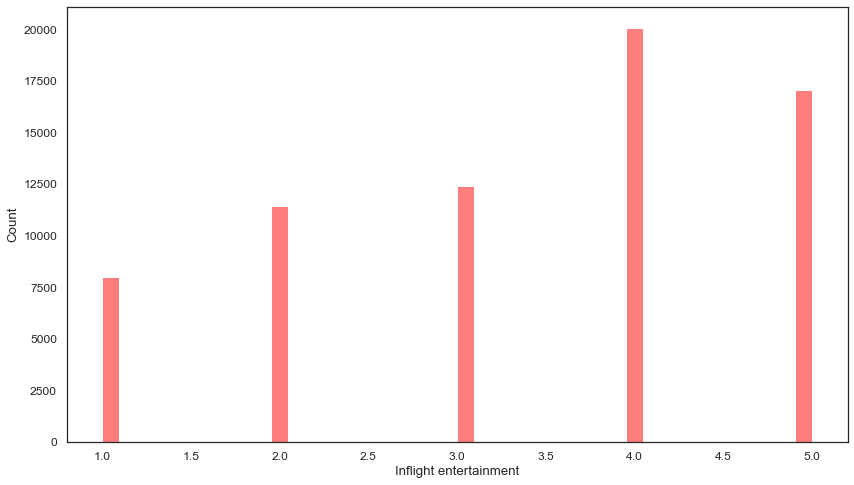

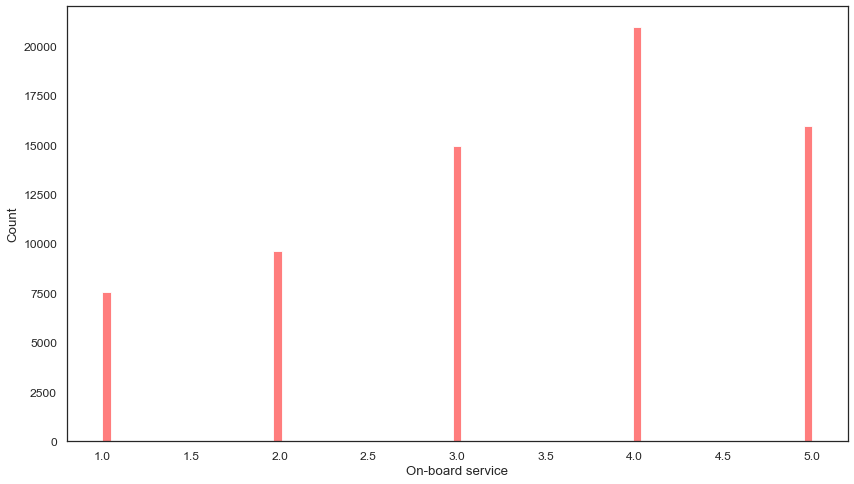

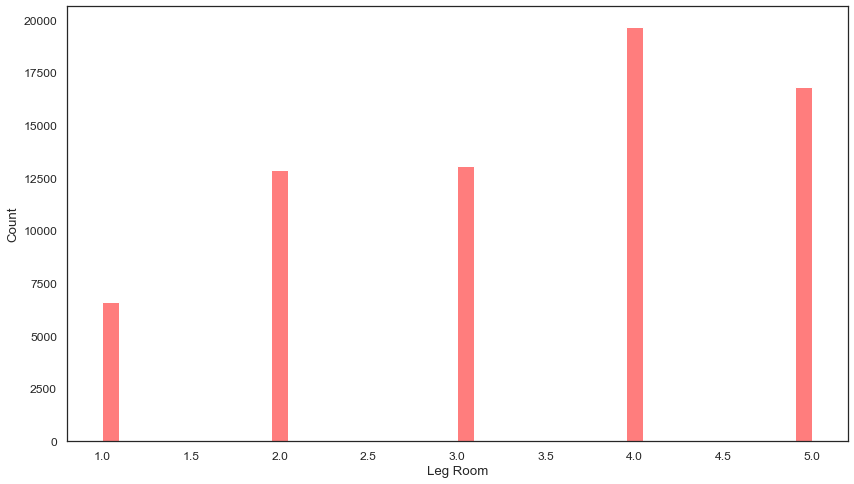

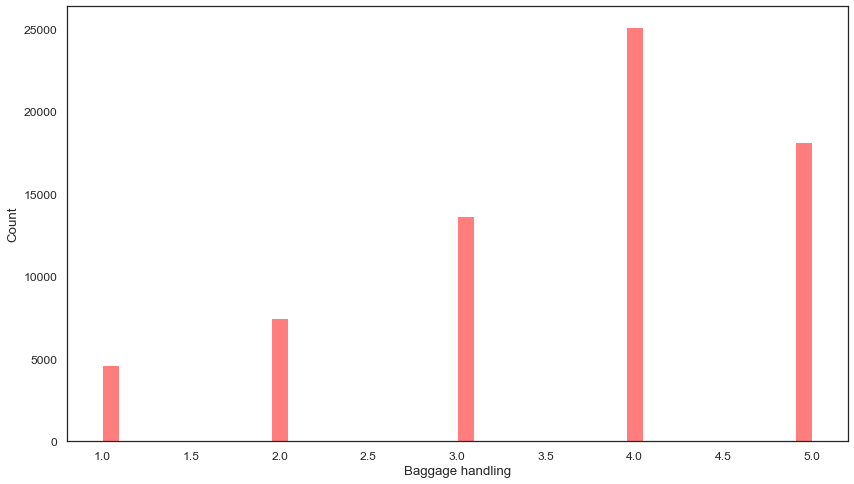

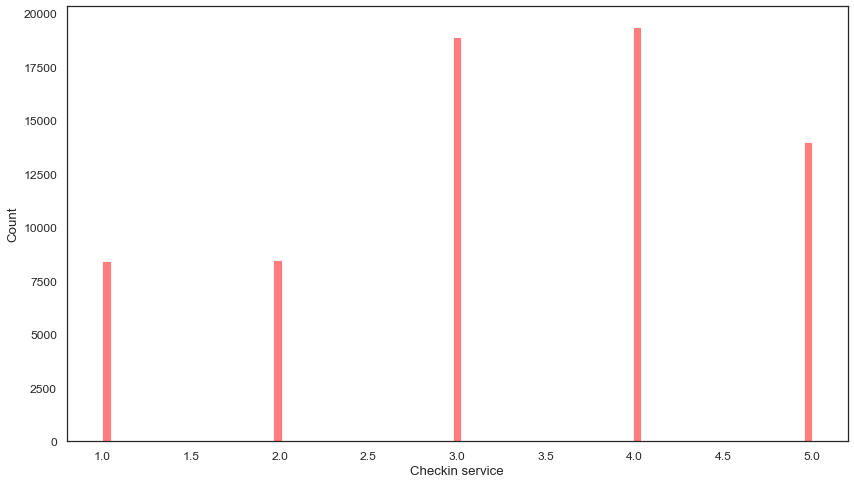

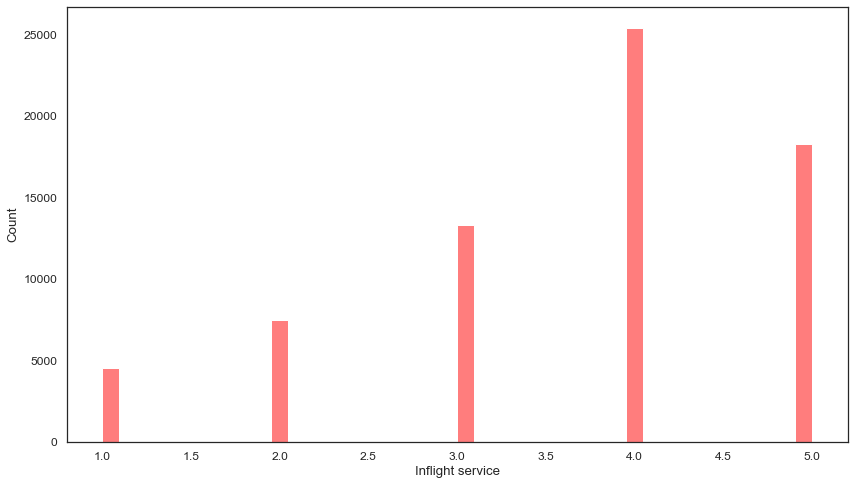

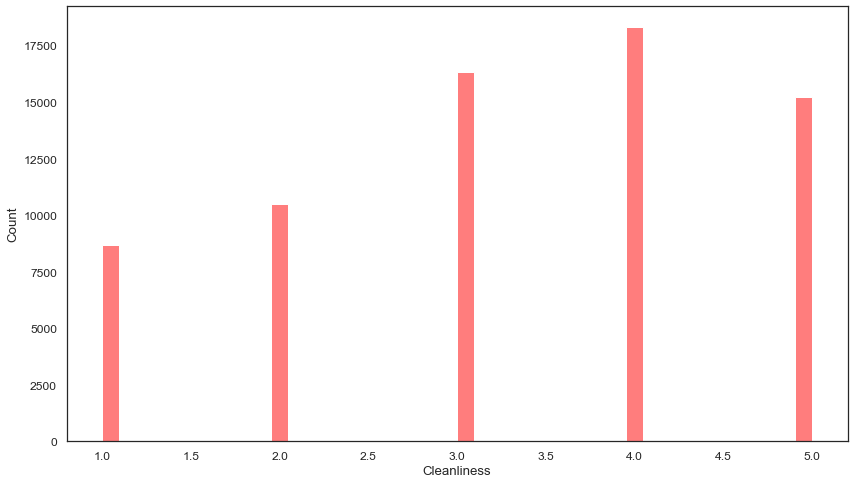

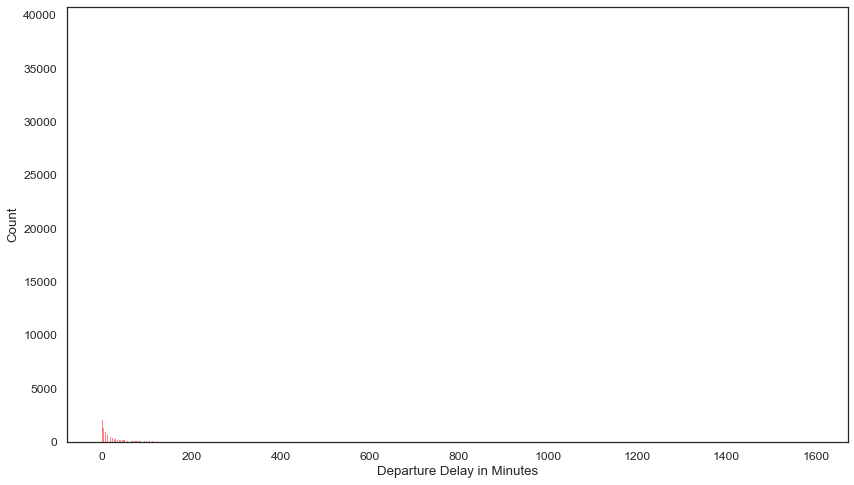

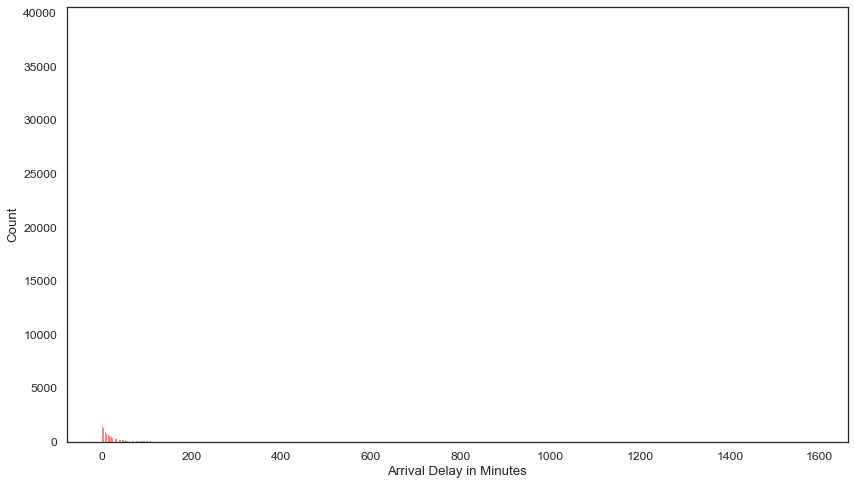

In [31]:
for col in data.columns:
    if col not in category:
        plt.figure(figsize=(14,8))
        sns.histplot(data[col], color="#ff5252")
        plt.show()

Concerning the arrival delay in minutes and the departure delay in minutes : 
in order to improve the vizualization of the data, we decided to remove outliers from the two columns concerning the departure and the arrival delay in minutes. As for the "gate location" column there is only data on 1,0, 3.0 and 5.0 values which can mean that there is missing values.

<AxesSubplot:>

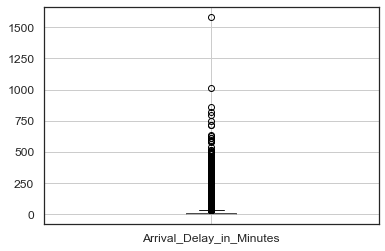

In [82]:
data.boxplot("Arrival_Delay_in_Minutes")

<AxesSubplot:>

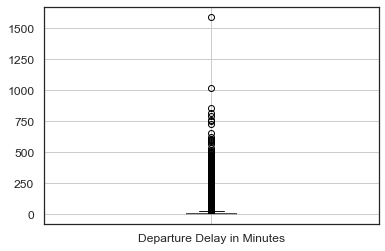

In [83]:
data.boxplot("Departure Delay in Minutes")

In [92]:
data.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,-0.071824,-0.041076,-0.068354
std,0.984343,0.961564,1.018260
min,-3.145468,-3.288853,-2.227693
25%,-0.732652,-0.716563,-0.754931
50%,-0.069668,-0.035804,-0.085572
75%,0.578395,0.598372,0.616615
max,2.006425,2.646938,2.905324


In [93]:
#removing outliers 
def remove_outlier(df_in, Arrival_Delay_in_Minutes):
    q1 = df_in[Arrival_Delay_in_Minutes].quantile(0.25)
    q3 = df_in[Arrival_Delay_in_Minutes].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[Arrival_Delay_in_Minutes] > fence_low) & (df_in[Arrival_Delay_in_Minutes] < fence_high)]
    return df_out

,0,1,2
0,-0.533003,-1.125368,0.321493
1,0.969628,-0.432510,-0.735546
2,-0.877170,-0.880670,1.203483
3,1.737397,1.047489,1.542041
4,-0.229768,-0.778935,-1.114656
...,...,...,...
95,-0.394320,0.583714,-0.385796
96,0.266058,-0.937630,-0.085203
97,-1.382876,-0.298910,1.306899
98,1.281206,-0.399531,0.704488
